# Exploratory Data Analysis

### Authors: Pranav, Sally, Jie 

## Introduction


#### The  problem  that  we  are  trying  to  investigate  is  the  effectiveness  of  IMU and Odometry for position estimation during autonomous car racing.  We are aiming to help Robots use IMU and Odometry sensor fusion with Kalman Filter State Estimation in cases when GPS and other mappings are not reliable,  or to supplement these readings.  In the following section we will investigate the reliability of the IMU sensor readings, as it is a core component of the robot’s sensor fusion.

## IMU Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
imu_data = pd.read_csv('../data/raw/IMU-Data-Sheet1.csv')
imu_data.head()

,x,y,z
0,0.83,4.30,5.03
1,1.66,-0.67,-6.53
2,3.93,4.16,2.85
3,-2.71,1.42,-7.74
4,0.30,-1.70,0.41


In [7]:
imu_ign_z = imu_data.drop('z',axis=1)
imu_ign_z.head()

,x,y
0,0.83,4.30
1,1.66,-0.67
2,3.93,4.16
3,-2.71,1.42
4,0.30,-1.70


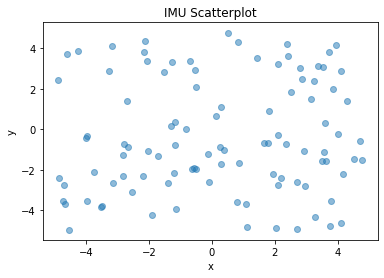

In [6]:
plt.scatter(imu_ign_z['x'], imu_ign_z['y'], alpha=0.5)
plt.title('IMU Scatterplot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### The IMU readings were generated using the IMU BMO080 accelerometer. These  readings  are  outputted  in  the  following  format:  x,y,z  in m/s2.   These readings  represent  the  directional  acceleration  during  sequential  timestamps. We  generated  100  of  these  data  values  to  analyze.   The  z  coordinate  was  interesting  to  handle  in comparison  to  the  x,y  values.   The  z  coordinate  would realistically be around 9.8m/s2 if we were traveling on a flat surface becauseit would ”accelerate” upward at 9.8m/s2 in order to counter gravitational acceleration.  In our case we are strictly focusing on x,y acceleration, therefore were moved the z value of the data because we are working on a flat surface so the z-coordinate is not important to us.  The data was taken at one second intervals,where the x row of the dataset represents x seconds has passed since the start. Our data was already relatively clean because the data schema of the outputis well designed , and did not need any specific cleaning or manipulation. This removed any needs for the usage of pipe lining for our IMU data.  Using these data values we plotted a scatter plot of all x and y acceleration values and found that there was no obvious correlation between the acceleration values and no bias.  This can be seen in the scatter plot because there are no obvious clumps in the graph and the data values are relatively spread out.

### Distributions of Acceleration Values

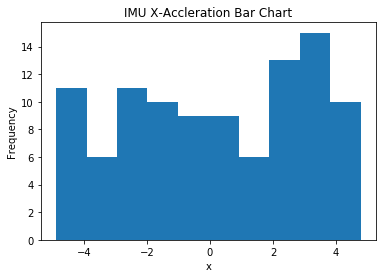

In [7]:
plt.hist(imu_ign_z['x'], bins=None)
plt.title('IMU X-Accleration Bar Chart')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

#### Next we plotted the distribution of x-direction acceleration values using ahistogram.   In  this  histogram  you  can  see  that  there  are  many  data  points that hover around 0 for acceleration.  We assumed that low acceleration occurs when a turn is happening.  Therefore the abundance of values around 0 indicates that  there  could  be  many  turns  in  the  track  we  are  navigating  on.   Another possibility is that the track is designed very straight so that there is not much X-acceleration  in  comparison  to  Y-acceleration.   The  peaks  around  -4  and  4m/s 2also indicates that there were many straight sections of the track where the car was able to accelerate quite fast

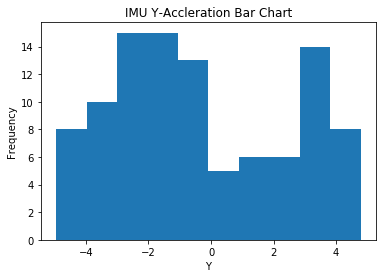

In [8]:
plt.hist(imu_ign_z['y'], bins=None)
plt.title('IMU Y-Accleration Bar Chart')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.show()

#### Then, we looked at was the Y-acceleration graph as a histogram.  In this final graph, we recognized that therewere significantly less values hovering around 0 compared to the X-acceleration graph.   This  shows  that  the  turns  in  this  track  are  probably  not  very  sharp turns because for all the low acceleration values in X, there are significantly low acceleration values in y.  This means for much of the track the car was traveling in mostly the y direction accelerating more in the y direction compared to thex direction.  This means our previous observation about the track containing more straight paths in which the car was mostly traveling and accelerating in the y direction is valid.

In [8]:
cov = np.cov(imu_ign_z['x'],imu_ign_z['y'])
cov

array([[8.26661196, 0.62869923],
       [0.62869923, 7.737561  ]])

#### Furthermore  by  analyzing  the  covariance  matrix  of  each  of  the  respective readings in x and y acceleration values,  one can see the variance of each was not significantly high, thus making it input ready for the Kalman Filter to be implemented.  This means the Kalman Filter can ”trust” these readings more during sensor fusion and won’t unpredictably bias the model.

## Positioning Method

In [9]:
s_x = []
s_y = []
time = [(x + 1)**2 for x in imu_data.index.tolist()]

In [10]:
s_x = (1/2) * imu_ign_z['x'] * (time)

In [11]:
s_y = (1/2) * imu_ign_z['y'] * (time)

In [12]:
imu_ign_z['position'] = list(zip(s_x, s_y))

In [13]:
imu_ign_z

,x,y,position
0,0.83,4.30,"(0.415, 2.15)"
1,1.66,-0.67,"(3.32, -1.34)"
2,3.93,4.16,"(17.685000000000002, 18.72)"
3,-2.71,1.42,"(-21.68, 11.36)"
4,0.30,-1.70,"(3.75, -21.25)"
...,...,...,...
95,3.56,-1.14,"(16404.48, -5253.12)"
96,-3.17,4.11,"(-14913.265, 19335.495000000003)"
97,2.70,-2.61,"(12965.400000000001, -12533.22)"
98,2.94,-1.08,"(14407.47, -5292.54)"


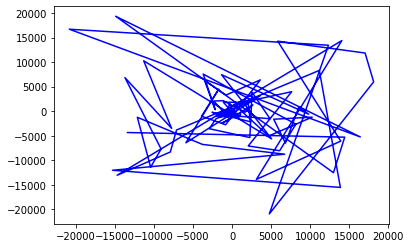

In [14]:
plt.plot(s_x, s_y,'b')
plt.show()

#### The method we specifically focused on was the tracking of the vehicle through calculation of where the vehicle was at every second.  How we approached thiswas  we  used  the  directional  acceleration  and  multiplied  it  by  one  half  times squared in order to achieve the x and y displacement with respect to the starting point, in our case (0,0).  We chose to find the coordinates because we can startto visualize the path the robot took.  We then proceeded to draw those data points out sequentially using the x and y coordinates and we created a traced path  that  the  vehicle  took.   When  comparing  this  to  ground  truth  data  and position estimates derived from odometry, we can establish that the IMU based track is reliable and will be an essential component during sensor fusion.

## Conclusion/Future Direction

#### Through our research and exploratory data analysis, we were able to determine the path, location, and overall turn and stop points that our robot took. We were able to find this through taking the acceleration of the x and y axis and using the acceleration equation of s(t) =v(0) + 1/2at2. After finding the positions,  we  plotted  the  path  that  the  robot  took  and  was  able  to  properly localize the area around the robot. After gathering the IMU and odometry positions,  we will find where they both converge and input them to create a Kalman filter to combine both methods for more accurate robotic localization.